In [ ]:
import numpy as np
import os
import pandas as pd

In [ ]:
# Install kagglehub
!pip install kagglehub

# Upload Kaggle API key
from google.colab import files
files.upload()  # Upload your kaggle.json file

# Set up Kaggle API key
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content"  # Assuming you uploaded kaggle.json

# Import kagglehub and download the dataset
import kagglehub
path = kagglehub.dataset_download("clmentbisaillon/fake-and-real-news-dataset")

# Print the path where dataset is saved
print("Path to dataset files:", path)


Saving kaggle.json to kaggle.json


100%|██████████| 41.0M/41.0M [00:00<00:00, 140MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/clmentbisaillon/fake-and-real-news-dataset/versions/1


In [ ]:
from google.colab import files
uploaded = files.upload()  # This will prompt you to upload your zip file


Saving archive.zip to archive.zip


In [ ]:
import zipfile

# Replace 'your_file.zip' with the name of your uploaded zip file
zip_path = 'archive.zip'

# Unzip the file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall('/content/sample_data')  # You can specify any directory


In [ ]:
import pandas as pd
fake = pd.read_csv('/content/sample_data/Fake.csv')
true=pd.read_csv('/content/sample_data/True.csv')
print(fake.head())
print(true.head())

                                               title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text subject  \
0  Donald Trump just couldn t wish all Americans ...    News   
1  House Intelligence Committee Chairman Devin Nu...    News   
2  On Friday, it was revealed that former Milwauk...    News   
3  On Christmas day, Donald Trump announced that ...    News   
4  Pope Francis used his annual Christmas Day mes...    News   

                date  
0  December 31, 2017  
1  December 31, 2017  
2  December 30, 2017  
3  December 29, 2017  
4  December 25, 2017  
                                               title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept t

In [36]:
fake['catagory']=1
true['catagory']=0

df=pd.concat([fake,true]).reset_index(drop=True)
df=df.drop(['title','subject','date'],axis=1)
df=df.sample(frac=1).reset_index(drop=True)
df.head()

,text,catagory
0,The hosts of Fox & Friends were hoping a Minne...,1
1,NEW YORK (Reuters) - A U.S. appeals court is ...,0
2,Trumpers are rejoicing over the escalating act...,1
3,,1
4,Chuck Norris wrote about Jade Helm 15 in a com...,1


In [37]:
#detecting missing values
df.isna().sum()*100/len(df)

,0
text,0.0
catagory,0.0


In [39]:
df = df.reset_index(drop=True)
blank=[]
for index,text in df['text'].items():
  if text.isspace():
    blank.append(index)
print(len(blank))

631


In [40]:
df.drop(blank,inplace=True)


In [51]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
import spacy
import re
nlp=spacy.load('en_core_web_sm')
lemma=WordNetLemmatizer()

list1=nlp.Defaults.stop_words
list2=stopwords.words('english')
Stopwords=set(set(list1)|set(list2))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [52]:
def clean_text(text):

    """
    It takes text as an input and clean it by applying several methods

    """

    string = ""

    #lower casing
    text=text.lower()

    #simplifying text
    text=re.sub(r"i'm","i am",text)
    text=re.sub(r"he's","he is",text)
    text=re.sub(r"she's","she is",text)
    text=re.sub(r"that's","that is",text)
    text=re.sub(r"what's","what is",text)
    text=re.sub(r"where's","where is",text)
    text=re.sub(r"\'ll"," will",text)
    text=re.sub(r"\'ve"," have",text)
    text=re.sub(r"\'re"," are",text)
    text=re.sub(r"\'d"," would",text)
    #text cleaning function
def clean_text(text):

    """
    It takes text as an input and clean it by applying several methods

    """

    string = ""

    #lower casing
    text=text.lower()

    #simplifying text
    text=re.sub(r"i'm","i am",text)
    text=re.sub(r"he's","he is",text)
    text=re.sub(r"she's","she is",text)
    text=re.sub(r"that's","that is",text)
    text=re.sub(r"what's","what is",text)
    text=re.sub(r"where's","where is",text)
    text=re.sub(r"\'ll"," will",text)
    text=re.sub(r"\'ve"," have",text)
    text=re.sub(r"\'re"," are",text)
    text=re.sub(r"\'d"," would",text)
    text=re.sub(r"won't","will not",text)
    text=re.sub(r"can't","cannot",text)

    #removing any special character
    text=re.sub(r"[-()\"#!@$%^&*{}?.,:]"," ",text)
    text=re.sub(r"\s+"," ",text)
    text=re.sub('[^A-Za-z0-9]+',' ', text)

    for word in text.split():
        if word not in Stopwords:
            string+=lemma.lemmatize(word)+" "

    return string

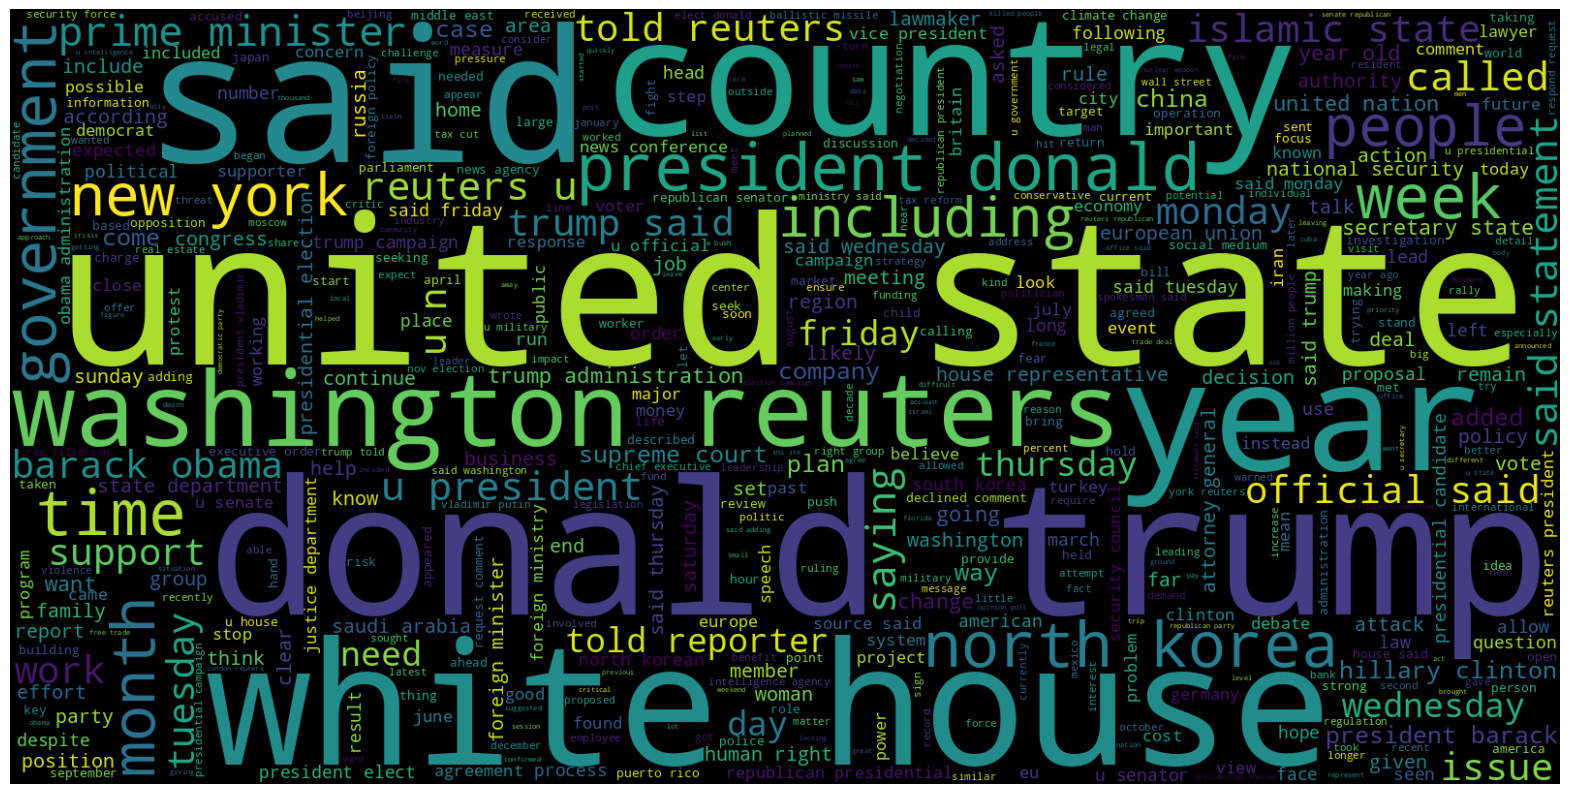

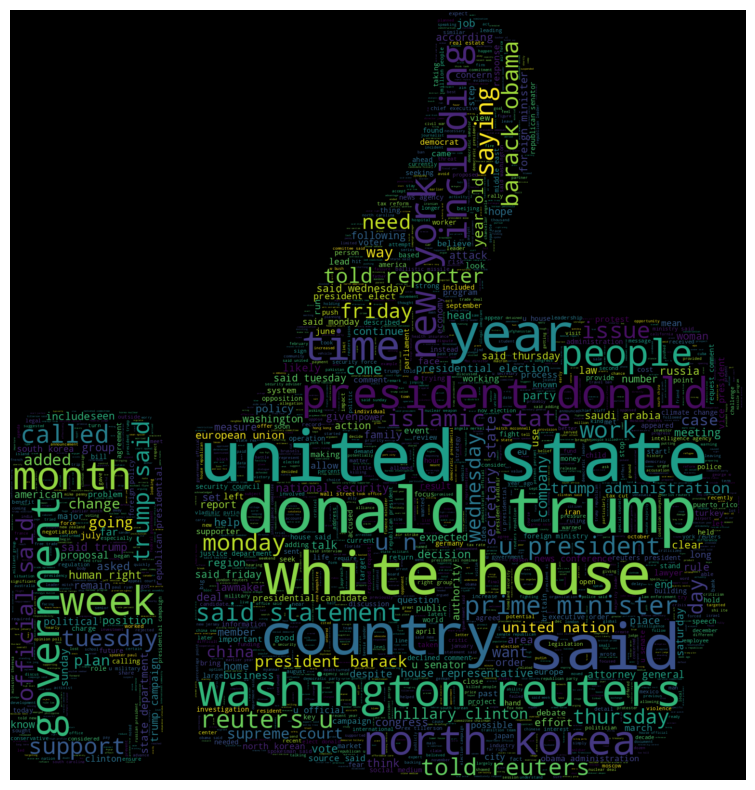

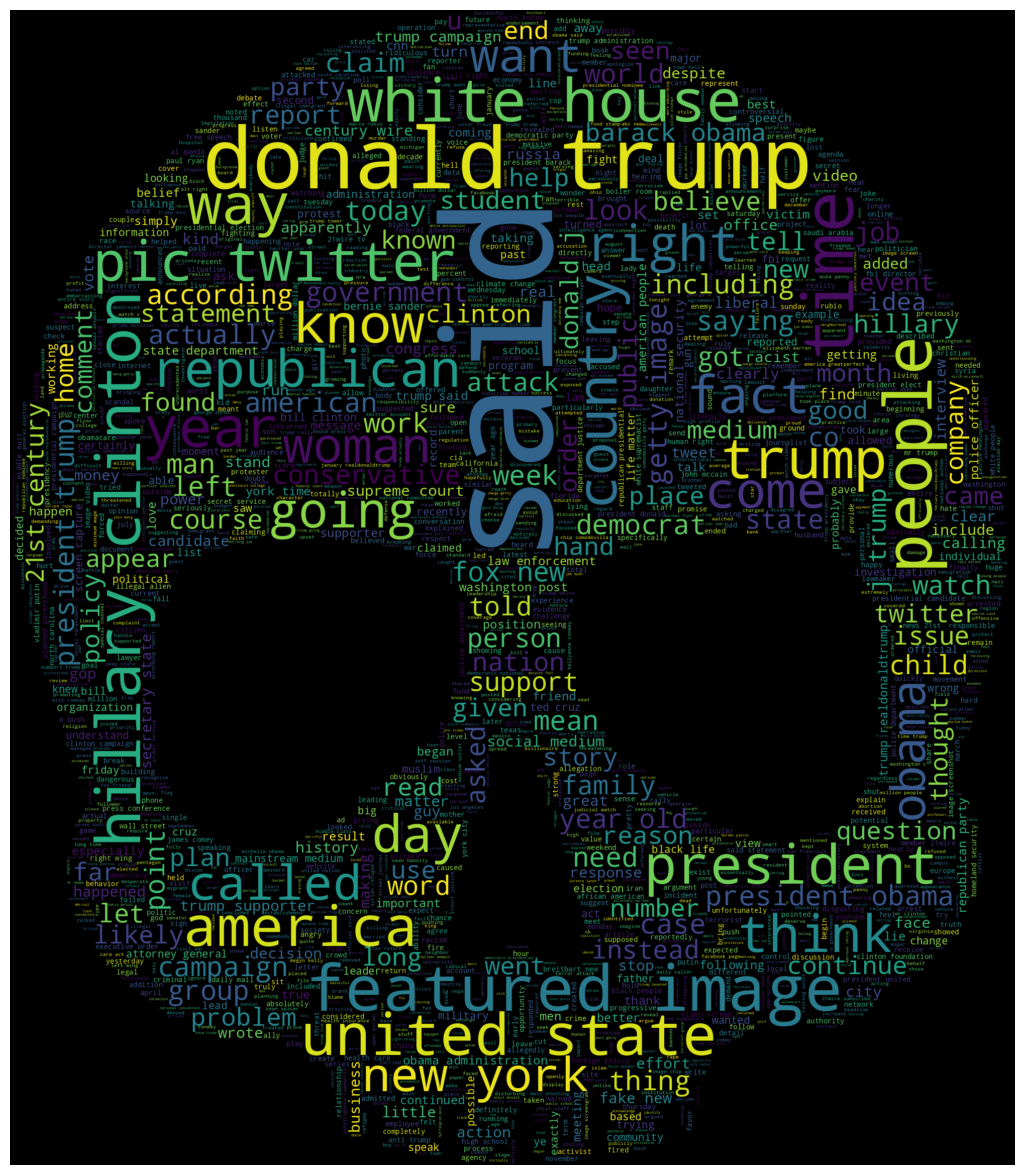

In [56]:
import matplotlib.pyplot as plt

df["text"]=df["text"].apply(clean_text)

from wordcloud import WordCloud
#True News
plt.figure(figsize = (20,20))
Wc = WordCloud(max_words = 500 , width = 1600 , height = 800).generate(" ".join(df[df.catagory == 0].text))
plt.axis("off")
plt.imshow(Wc , interpolation = 'bilinear')

from PIL import Image
#creating a mask of thumb
thumb="/content/thumbs-up.png"
icon=Image.open(thumb)
mask=Image.new(mode="RGB",size=icon.size, color=(255,255,255))
mask.paste(icon, box=icon)

rgb_array=np.array(mask)
#True News
plt.figure(figsize = (10,10))
Wc = WordCloud(mask=rgb_array,max_words = 2000 , width = 1600 ,
               height = 800)

Wc.generate(" ".join(df[df.catagory == 0].text))
plt.axis("off")
plt.imshow(Wc , interpolation = 'bilinear')

skull="/content/skull-icon.png"
icon=Image.open(skull)
mask=Image.new(mode="RGB",size=icon.size, color=(255,255,255))
mask.paste(icon, box=icon)

rgb_array=np.array(mask)
#Fake News
plt.figure(figsize = (15,15))
Wc = WordCloud(mask=rgb_array,max_words = 2000 , width = 1600 ,
               height = 800)

Wc.generate(" ".join(df[df.catagory == 1].text))
plt.axis("off")
plt.imshow(Wc , interpolation = 'bilinear')

In [58]:
from sklearn.model_selection import train_test_split


X=df["text"] #feature
y=df["catagory"] # traget

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
#importing libraries to build a pipline
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
#this pipe line will take the text and vectorise it , and then TF-IDF, then fitting the model

text_clf=Pipeline([("tfidf",TfidfVectorizer()),("clf",LinearSVC())])
text_clf.fit(X_train,y_train)

predictions=text_clf.predict(X_test)
from sklearn import metrics
print(metrics.classification_report(y_test,predictions))

print(metrics.accuracy_score(y_test,predictions))
print(metrics.confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      7035
           1       0.99      0.99      0.99      7574

    accuracy                           0.99     14609
   macro avg       0.99      0.99      0.99     14609
weighted avg       0.99      0.99      0.99     14609

0.9921281401875556
[[6973   62]
 [  53 7521]]
